In [15]:
from src.solver_results.results_dataset import VRPTableDataset
from src.solver_results.vrp_instance import VRPInstance
from src.solver_results.pca_analysis import PCAAnalyzer
from src.solver_results.classification_analysis import ClassificationAnalyzer
from src.solver_results.first_valid_dataset import FirstValidDataset

import pandas as pd
import numpy as np

In [16]:
def load_vrp_instances(path, instance_range):
    """Load VRP instances from CSV files."""
    instances = []

    for i in instance_range:
        filename = f"instance_{i}.csv"
        try:
            df = pd.read_csv(f"{path}/{filename}")

            instance = VRPInstance(i, df)
            instances.append(instance)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    return instances


def run_pca_analysis(X, Y, feature_cols):
    """Run PCA analysis."""
    print("\n" + "=" * 50)
    print("PCA ANALYSIS")
    print("=" * 50)

    pca_analyzer = PCAAnalyzer()
    pca_analyzer.plot_analysis(X, Y, feature_cols)

    # Find optimal components
    optimal_components, results_df = pca_analyzer.find_optimal_components(X, Y)

    return pca_analyzer


def run_classification_analysis(X, Y, feature_cols):
    """Run classification analysis."""
    print("\n" + "=" * 50)
    print("CLASSIFICATION ANALYSIS")
    print("=" * 50)

    classifier_analyzer = ClassificationAnalyzer()

    # Analyze with original features
    results_original = classifier_analyzer.run_analysis(
        X, Y, feature_cols, "Original Features"
    )

    # Analyze with PCA features
    pca_analyzer = PCAAnalyzer()
    X_pca, pca_reduced = pca_analyzer.get_pca_features(X, n_components=0.95)
    pca_feature_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

    results_pca = classifier_analyzer.run_analysis(
        X_pca, Y, pca_feature_names, f"PCA Features ({X_pca.shape[1]} components)"
    )

    return results_original, results_pca





In [17]:
path = "output/resnet_1_1_2e-07_version2"

VRPInstances = load_vrp_instances(path, range(1001, 1076))

    # Define features
feature_cols = [
    "entropy_score",
    "classifier_score",
    # "iter",
    "entropy_variation",
    "classifier_score_variation",
    "top_arc_value",
    "top_3_arcs",
    "top_arc_variation",
    "top_3_arcs_variation",
]

# Create dataset
dataset = VRPTableDataset(
    vrp_instances=VRPInstances,
    feature_cols=feature_cols,
    target_col="first_time_valid",
    # target_col="valid"
)

first_valid_dataset = FirstValidDataset(VRPInstances)

X, Y = dataset.get_sklearn_inputs()

Cost difference computed and added to dataset.



PCA ANALYSIS


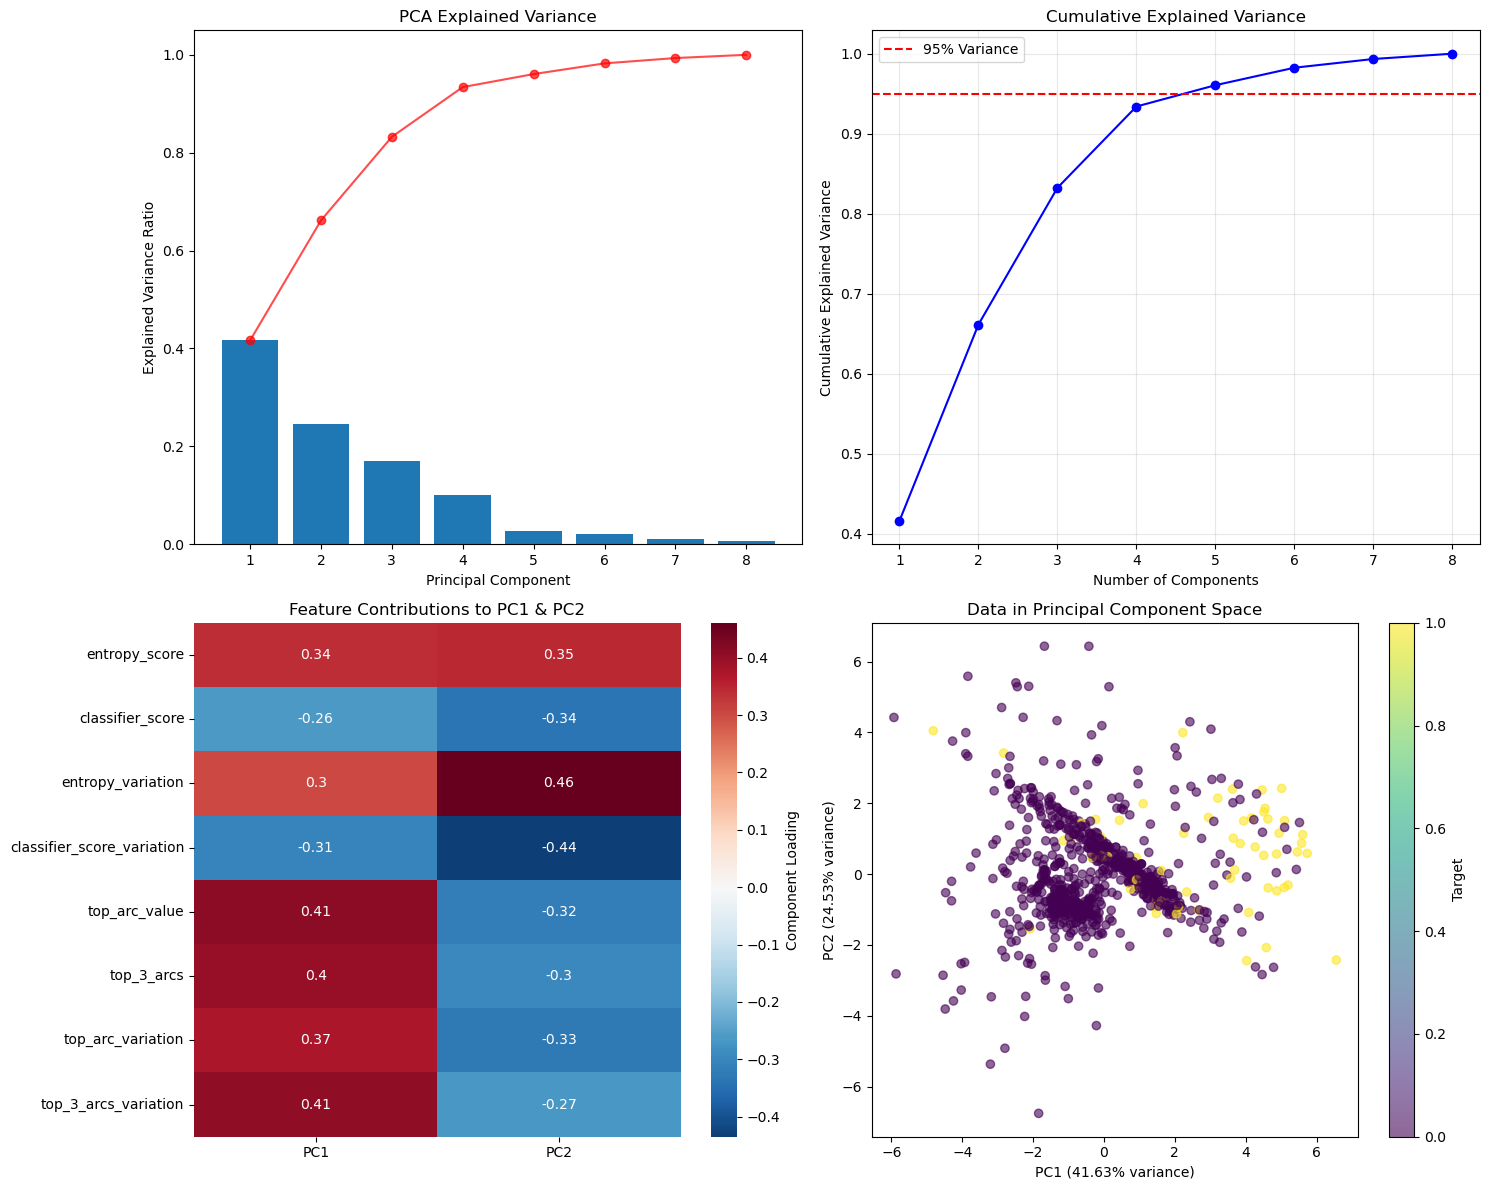


=== PCA Analysis Results ===
Total variance explained by first 2 components: 66.16%
Total variance explained by first 3 components: 83.24%

Most important features for PC1:
top_arc_value                 0.408736
top_3_arcs_variation          0.405405
top_3_arcs                    0.398982
top_arc_variation             0.374579
entropy_score                 0.338683
classifier_score_variation    0.308282
entropy_variation             0.302075
classifier_score              0.260944
dtype: float64

Most important features for PC2:
entropy_variation             0.460888
classifier_score_variation    0.435035
entropy_score                 0.345744
classifier_score              0.336027
top_arc_variation             0.326993
top_arc_value                 0.316538
top_3_arcs                    0.295478
top_3_arcs_variation          0.267294
dtype: float64


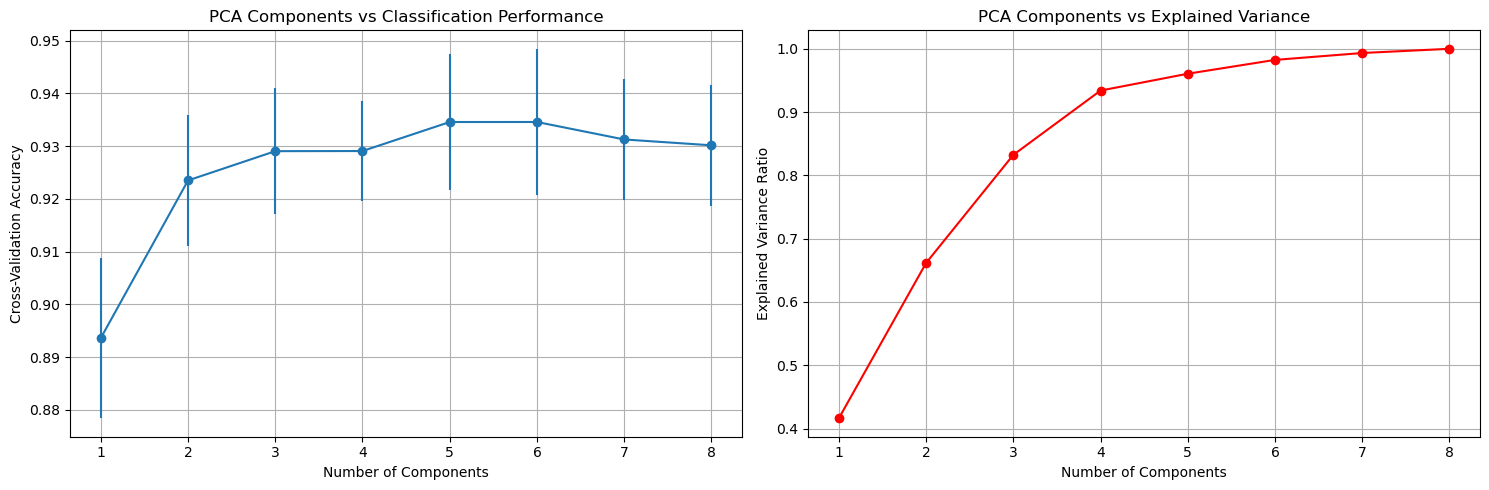

Optimal number of components: 6.0
Best accuracy: 0.935


In [18]:
run_pca_analysis(X, Y, feature_cols)


CLASSIFICATION ANALYSIS

Original Features:

Random Forest:
  Test Accuracy: 0.940
  CV Accuracy: 0.942 (+/- 0.026)
  ROC AUC: 0.860
  Confusion Matrix:
[[415   3]
 [ 24   9]]

Gradient Boosting:
  Test Accuracy: 0.931
  CV Accuracy: 0.936 (+/- 0.047)
  ROC AUC: 0.795
  Confusion Matrix:
[[409   9]
 [ 22  11]]

SVM:
  Test Accuracy: 0.909
  CV Accuracy: 0.925 (+/- 0.043)
  ROC AUC: 0.827
  Confusion Matrix:
[[391  27]
 [ 14  19]]

Logistic Regression:
  Test Accuracy: 0.882
  CV Accuracy: 0.878 (+/- 0.057)
  ROC AUC: 0.831
  Confusion Matrix:
[[377  41]
 [ 12  21]]

Decision Tree:
  Test Accuracy: 0.876
  CV Accuracy: 0.869 (+/- 0.049)
  ROC AUC: 0.750
  Confusion Matrix:
[[376  42]
 [ 14  19]]

Best Classifier: Random Forest

Feature Importance (Random Forest):
  entropy_score: 0.2118
  classifier_score_variation: 0.1620
  entropy_variation: 0.1248
  top_3_arcs: 0.1236
  top_arc_value: 0.1199
  classifier_score: 0.1011
  top_arc_variation: 0.0789
  top_3_arcs_variation: 0.0779


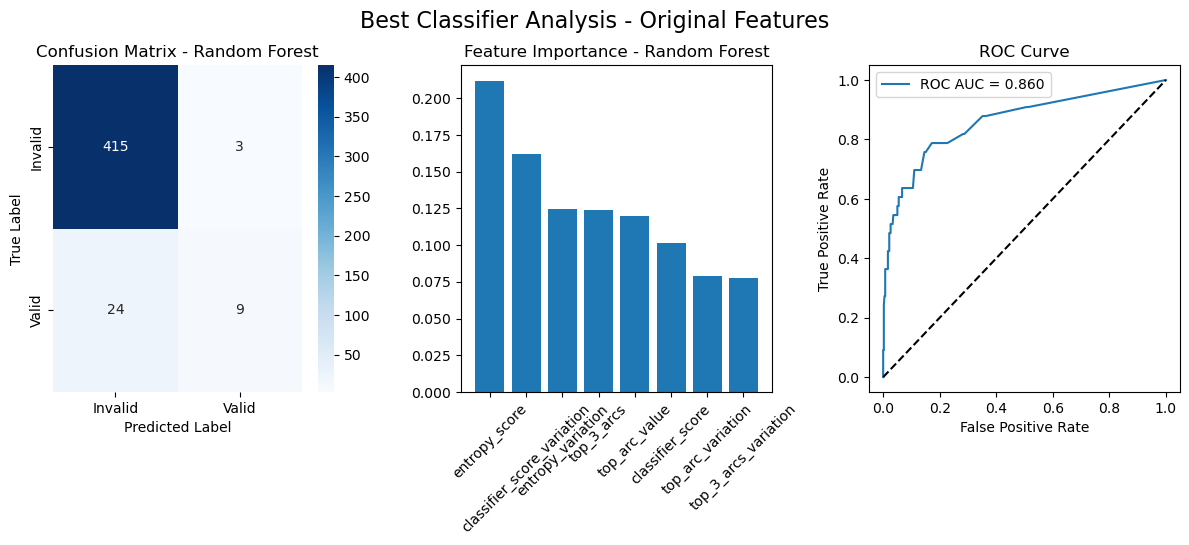

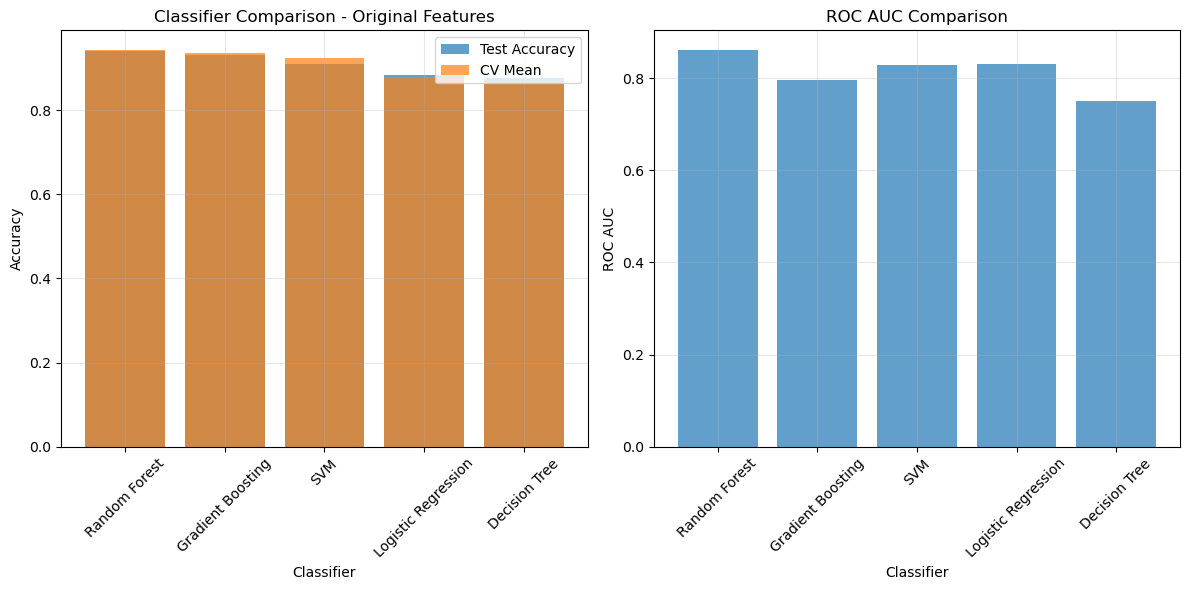


Classifier Comparison - Original Features:
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.940    0.942   0.013    0.860
  Gradient Boosting          0.931    0.936   0.024    0.795
                SVM          0.909    0.925   0.022    0.827
Logistic Regression          0.882    0.878   0.028    0.831
      Decision Tree          0.876    0.869   0.024    0.750

PCA Features (5 components):

Random Forest:
  Test Accuracy: 0.940
  CV Accuracy: 0.942 (+/- 0.021)
  ROC AUC: 0.827
  Confusion Matrix:
[[415   3]
 [ 24   9]]

Gradient Boosting:
  Test Accuracy: 0.933
  CV Accuracy: 0.914 (+/- 0.038)
  ROC AUC: 0.817
  Confusion Matrix:
[[408  10]
 [ 20  13]]

SVM:
  Test Accuracy: 0.894
  CV Accuracy: 0.896 (+/- 0.058)
  ROC AUC: 0.825
  Confusion Matrix:
[[382  36]
 [ 12  21]]

Logistic Regression:
  Test Accuracy: 0.869
  CV Accuracy: 0.865 (+/- 0.073)
  ROC AUC: 0.840
  Confusion Matrix:
[[370  48]
 [ 11  22]]

Decision Tree:
  Test Accuracy:

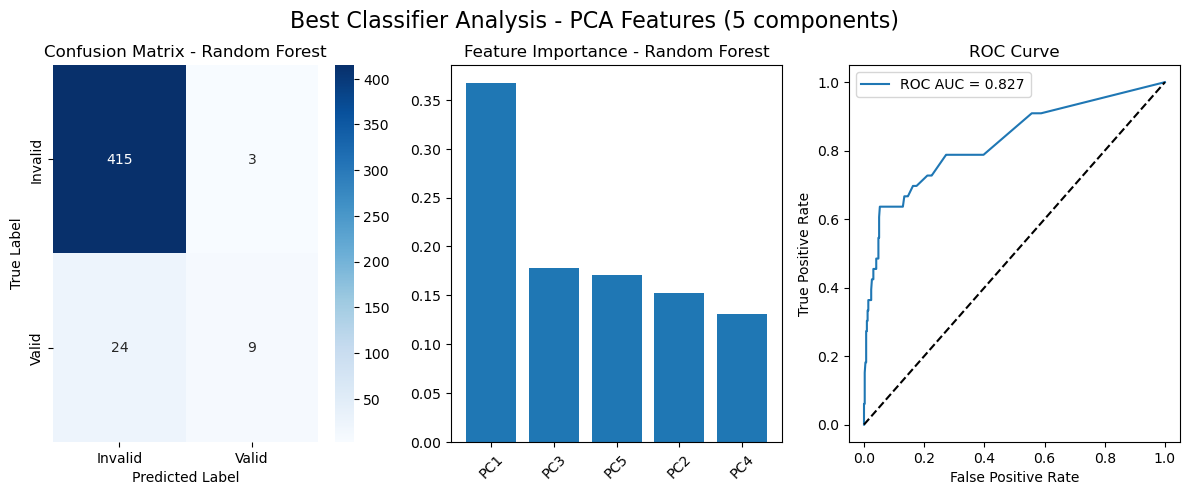

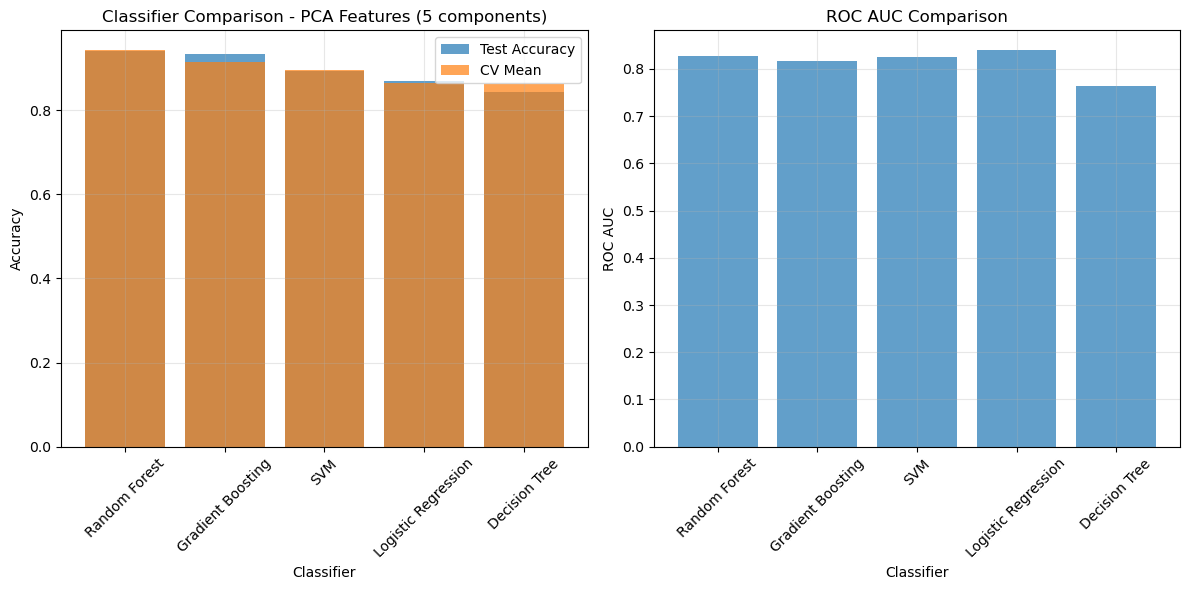


Classifier Comparison - PCA Features (5 components):
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.940    0.942   0.011    0.827
  Gradient Boosting          0.933    0.914   0.019    0.817
                SVM          0.894    0.896   0.029    0.825
Logistic Regression          0.869    0.865   0.036    0.840
      Decision Tree          0.843    0.862   0.032    0.764


({'Random Forest': {'accuracy': 0.9401330376940134,
   'cv_mean': 0.9423687423687424,
   'cv_std': 0.01286010515417521,
   'confusion_matrix': array([[415,   3],
          [ 24,   9]], dtype=int64),
   'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
   'roc_auc': 0.8604828186167899,
   'predictions': array([False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False,  True, False, False, False, False,
          False,  True, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False

In [19]:
run_classification_analysis(X, Y, feature_cols)

In [20]:
first_valid_dataset.print_summary()

FIRST VALID DATASET SUMMARY
Total VRP instances: 75
Instances with first valid: 67
Instances without valid: 8
Success rate: 89.3%

First Valid Iteration Statistics:
  Average iteration to first valid: 8.6
  Min iteration to first valid: 2.0
  Max iteration to first valid: 44.0

Cost Statistics (first valid):
  Average solver cost difference : -0.32
  Average easy cost difference: 0.31
